In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
path = '/content/drive/MyDrive/Dataset/train.csv'
df = pd.read_csv(path)
#df.head()
#df.shape
df.info()
'''
Con head() nos arroja las 5 primeras filas, las 10 primeras columnas y las 10 ultimas.
Con .shape muestra la cantidad de filas y de columnas en una tupla
Y con .info() muestra la clase del dataframe, la cantidad de indices y columnas, y por cada columna, su nombre, cuantos registros no nulos y el tipo de datos
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

'\nCon head() nos arroja las 5 primeras filas, las 10 primeras columnas y las 10 ultimas.\nCon .shape muestra la cantidad de filas y de columnas en una tupla\nY con .info() muestra la clase del dataframe, la cantidad de indices y columnas, y por cada columna, su nombre, cuantos registros no nulos y el tipo de datos\n'

La cantidad de filas que hay es de 1460 con 81 columnas, tipo de datos tenemos float (3 columnas), object (43 columnas) y int64 (35 columnas).


In [5]:
df = df.drop(columns=['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'])

De acuerdo a lo investigado, columnas de entre un 40% a 50% con valores nulos se suelen eliminar. Las columnas escogidas para eliminar fueron: Alley, MasVnrType, PoolQC, Fence, MiscFeature y FireplaceQu esto debido a su alto porcentaje de valores nulos

In [6]:
'''
count = (df['LotFrontage'] == df['LotFrontage'].mode()[0]).sum()
60 es la moda y se repite 143 veces 10%
df['LotFrontage'].std()
Tiene una desviacion estandar de 24, reelevante para la columna
'''
lotFrontageMode = df['LotFrontage'].median()
print(lotFrontageMode)
df['LotFrontage'] = df['LotFrontage'].fillna(lotFrontageMode)
#df['LotFrontage'] = df['LotFrontage'].replace(" ",lotFrontageMode)

df['LotFrontage'].isnull().sum()


69.0


np.int64(0)

Para columna LotFrontage se considero imputarla con la mediana, devido a su alta desviacion y poco porcentaje de la moda

In [7]:
'''
count = (df['MasVnrArea'] == df['MasVnrArea'].mode()[0]).sum()
print(count)
0.0 es la moda y se repite 869 veces +50%
df['MasVnrArea'].std()
Tiene una desviacion estandar de 184, muy alta para usar la media
'''
masVnrAreaMode = df['MasVnrArea'].mode()[0]
df['MasVnrArea'] = df['MasVnrArea'].fillna(masVnrAreaMode)

df['MasVnrArea'].isnull().sum()

np.int64(0)

Para columna 'MasVnrArea' se considero imputarla con la moda, debido a su alta desviación y que su moda representaba mas del 50% de los datos

In [18]:
'''
df['GarageYrBlt'].std()
Desvicacion estandar de 24.69, baja teniendo en cuenta que los datos van de 1900 a 2010
'''

AVG_GarageYrBlt = df['GarageYrBlt'].mean()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(AVG_GarageYrBlt)

df['GarageYrBlt'].isnull().sum()

np.int64(0)

Para la columna GarageYrBlt se utilizara la media, esto debido a que su desviacion estadandar no es muy reelevante (24,69 con un minimo y maximo de  1900 y 2010 respectivamente).

In [9]:
'''
Son columnas cualitativas, solo se puede usar la moda
Para estas columnas se podrian una categoriazacion con base a las otras columnas para calcular un valor para reemplazar
'''
columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for column in columns:
  currentMode = df[column].mode()[0]
  df[column] = df[column].fillna(currentMode)
  nullCount = df[column].isnull().sum()
  print(f"Columna: {column} Nulos: {nullCount}")



Columna: BsmtQual Nulos: 0
Columna: BsmtCond Nulos: 0
Columna: BsmtExposure Nulos: 0
Columna: BsmtFinType1 Nulos: 0
Columna: BsmtFinType2 Nulos: 0
Columna: Electrical Nulos: 0
Columna: GarageType Nulos: 0
Columna: GarageFinish Nulos: 0
Columna: GarageQual Nulos: 0
Columna: GarageCond Nulos: 0


Debido a que las columnas BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 y BsmtFinType2 es cualitativa (no es de tipo numérica), la opción es llenar con la moda, ya que solo son 37 datos faltantes

In [10]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

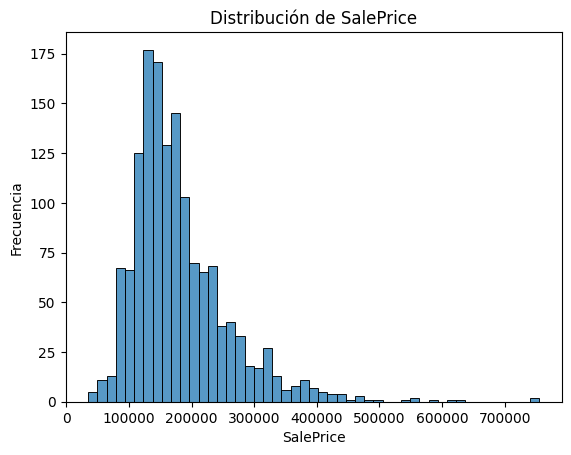

In [11]:
# Distribucion de las propiedades
sns.histplot(df["SalePrice"])

plt.title("Distribución de SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.show()

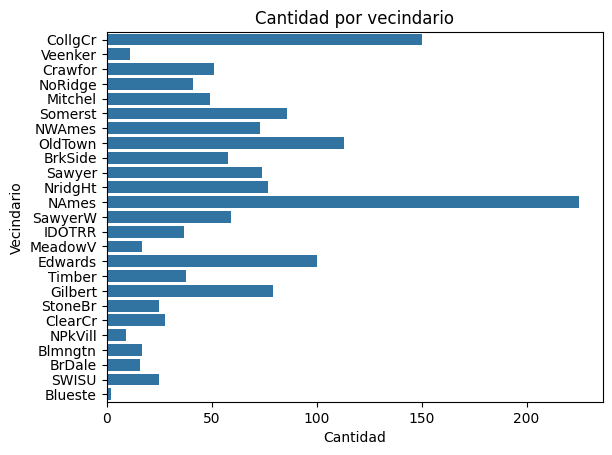

In [12]:
# Distribucion de los vecindarios
sns.countplot(df["Neighborhood"])

plt.title("Cantidad por vecindario")
plt.xlabel("Cantidad")
plt.ylabel("Vecindario")
plt.show()

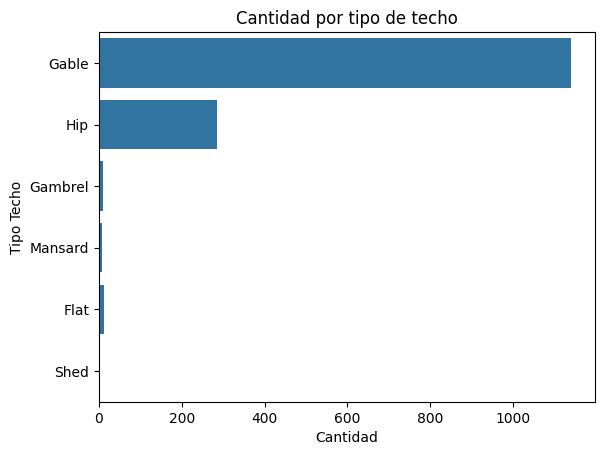

In [13]:
# Distribucion de los vecindarios
sns.countplot(df["RoofStyle"])

plt.title("Cantidad por tipo de techo")
plt.xlabel("Cantidad")
plt.ylabel("Tipo Techo")
plt.show()

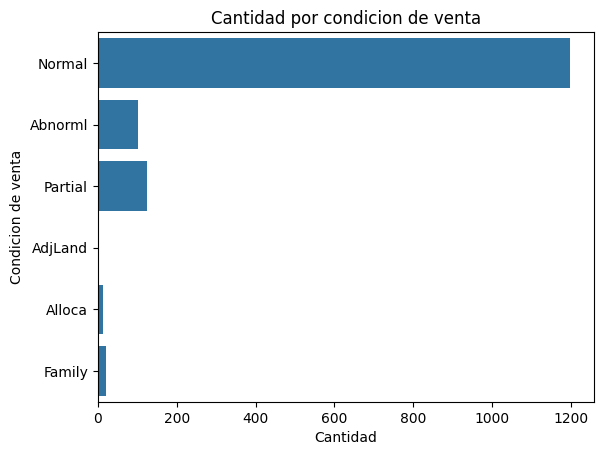

In [14]:
# Distribucio de condicion de venta
sns.countplot(df["SaleCondition"])

plt.title("Cantidad por condicion de venta")
plt.xlabel("Cantidad")
plt.ylabel("Condicion de venta")
plt.show()

In [15]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calcular matriz de correlación
corr_matrix = numeric_df.corr()

# Extraer solo las correlaciones con SalePrice
saleprice_corr = corr_matrix["SalePrice"].sort_values(ascending=False)

print(saleprice_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Las 5 variables con las correlaciones mas altas con SalePrice son: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF.

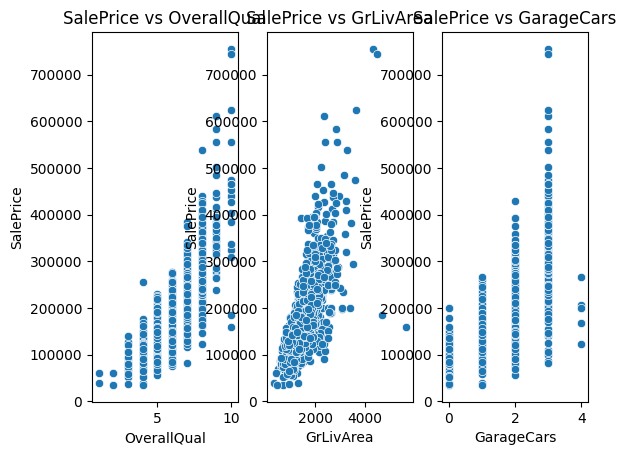

In [16]:
top3 = ['OverallQual', 'GrLivArea', 'GarageCars']

for i, col in enumerate(top3, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col], y=df["SalePrice"])
    plt.title(f"SalePrice vs {col}")

plt.show()

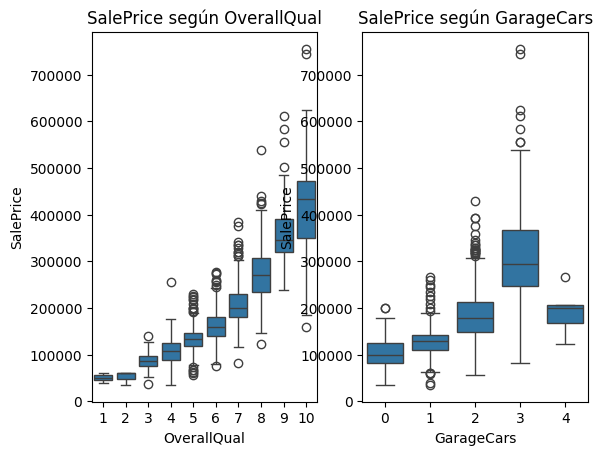

In [17]:
plt.subplot(1,2,1)
sns.boxplot(x=df["OverallQual"], y=df["SalePrice"])
plt.title("SalePrice según OverallQual")

plt.subplot(1,2,2)
sns.boxplot(x=df["GarageCars"], y=df["SalePrice"])
plt.title("SalePrice según GarageCars")

plt.show()

Al final podemos concluir que la caracteristica que mas influye en el precio es OverallQual que vendria siendo la calidad general de una casa